In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from vega_datasets import data


In [45]:
df_temps = data.sf_temps()
df_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [46]:
df_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<Axes: xlabel='date'>

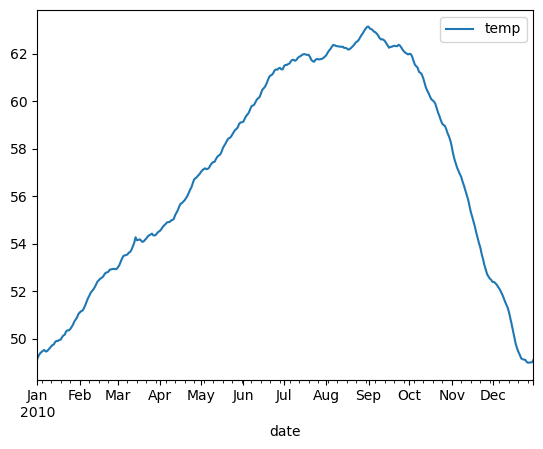

In [50]:
df_temps.resample('D', on='date').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

<Axes: xlabel='day'>

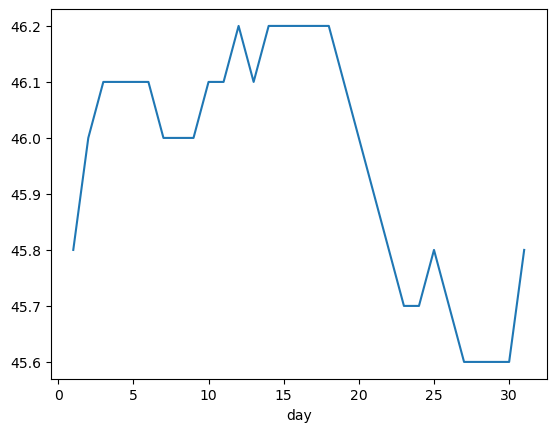

In [7]:
df_temps.groupby('day').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<Axes: xlabel='day'>

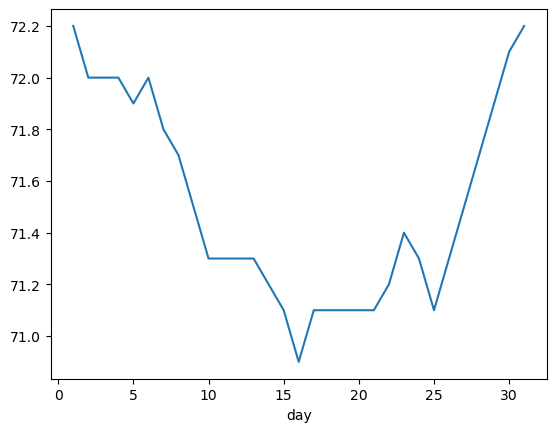

In [8]:
df_temps.groupby('day').max().temp.plot()

4. Which month is the coldest, on average?

In [9]:
df_temps['month'] = df_temps.date.dt.month

In [10]:
df_temps.groupby('month').mean().temp.sort_values()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/2063052165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temps.groupby('month').mean().temp.sort_values()


month
1     49.984140
12    50.498253
2     52.243899
3     53.956528
11    55.185139
4     55.633056
5     57.970968
10    60.253091
6     60.444722
7     61.765457
8     62.405376
9     62.487083
Name: temp, dtype: float64

5. Which month has the highest average temperature?

In [11]:
df_temps.groupby('month').mean().temp.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/3123377654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temps.groupby('month').mean().temp.sort_values(ascending=False)


month
9     62.487083
8     62.405376
7     61.765457
6     60.444722
10    60.253091
5     57.970968
4     55.633056
11    55.185139
3     53.956528
2     52.243899
12    50.498253
1     49.984140
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [51]:
df_temps.resample('D', on='date').mean().agg(['min', 'max']).temp


min    48.991667
max    63.129167
Name: temp, dtype: float64

In [13]:
df_temps.head()

,temp,date,day,month
0,47.8,2010-01-01 00:00:00,1,1
1,47.4,2010-01-01 01:00:00,1,1
2,46.9,2010-01-01 02:00:00,1,1
3,46.5,2010-01-01 03:00:00,1,1
4,46.0,2010-01-01 04:00:00,1,1


# Seattle Dataset

use seattle weather dataset

In [14]:
df_seattle = data.seattle_weather()

In [15]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
df_seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [77]:
df_seattle = df_seattle.set_index('date').sort_index()

1. Which year and month combination has the highest amount of precipitation? December 2015

In [78]:
df_seattle.precipitation.resample('M').sum().sort_values(ascending=False)

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
2012-12-31    174.0
2012-01-31    173.3
2014-10-31    171.5
2012-10-31    170.3
2013-09-30    156.8
2014-02-28    155.2
2013-04-30    149.6
2015-02-28    134.2
2014-11-30    123.1
2015-10-31    122.4
2014-12-31    121.8
2015-03-31    113.5
2014-04-30    106.1
2013-01-31    105.7
2013-11-30     96.3
2014-01-31     94.0
2015-01-31     93.0
2012-02-29     92.3
2015-08-31     83.3
2014-05-31     80.0
2012-06-30     75.1
2013-03-31     69.7
2012-04-30     68.1
2013-05-31     60.5
2014-09-30     56.7
2012-05-31     52.2
2015-04-30     51.6
2014-08-31     46.0
2013-12-31     42.4
2013-02-28     40.3
2013-10-31     39.2
2013-08-31     34.4
2013-06-30     33.1
2012-07-31     26.3
2015-09-30     21.1
2014-07-31     19.6
2014-06-30     18.8
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2012-09-30      0.9
2013-07-31      0.0
2012-08-31      0.0
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

<Axes: xlabel='date'>

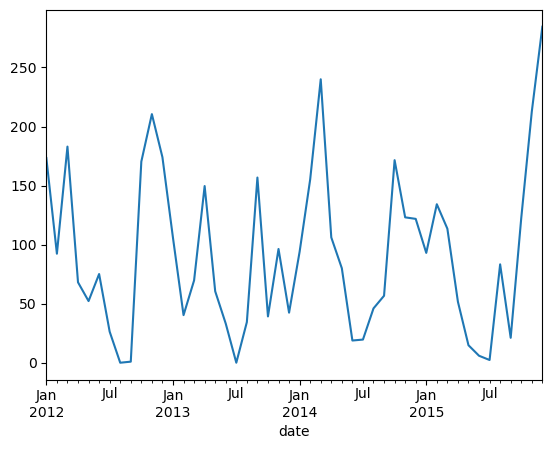

In [80]:
df_seattle.precipitation.resample('M').sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<Axes: xlabel='date'>

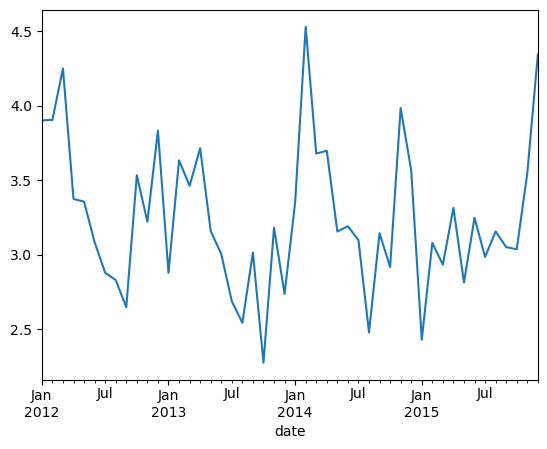

In [82]:
df_seattle.wind.resample('M').mean().plot()

4. Which year-month combination is the windiest?

In [83]:
df_seattle.wind.resample('M').mean().sort_values(ascending=False).head(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [85]:
df_seattle.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [87]:
df_seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [96]:
df_seattle['sunny_day'] = df_seattle.weather == 'sun'
df_seattle['rainy_day'] = df_seattle.weather == 'rain'

In [90]:
df_seattle.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

6. In which month does it rain the most?

In [91]:
df_seattle.groupby('month').mean().precipitation.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/2360226346.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle.groupby('month').mean().precipitation.sort_values(ascending=False)


month
11    5.354167
12    5.021774
3     4.888710
10    4.059677
1     3.758065
2     3.734513
4     3.128333
9     1.962500
5     1.673387
8     1.320161
6     1.107500
7     0.388710
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [101]:
df_seattle['precip_amnt'] = df_seattle.precipitation > 0

In [102]:
df_seattle.groupby('month').precip_amnt.mean().sort_values(ascending=False)

month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
10    0.491935
4     0.491667
6     0.308333
9     0.291667
5     0.274194
8     0.177419
7     0.088710
Name: precip_amnt, dtype: float64

# Flight dataset

Use flight data

In [40]:
df_flights = data.flights_20k()


In [41]:
df_flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [42]:
df_flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [61]:
df_flights = df_flights.set_index('date').sort_index()

1. Convert any negative delays to 0.

In [56]:
df_flights['delay'] = np.where(df_flights['delay'] < 0, 0, df_flights['delay'])

In [58]:
df_flights.sample(5)

,date,delay,distance,origin,destination
7030,2001-01-05 13:45:00,0,314,CLE,BWI
15848,2001-01-01 16:30:00,0,718,SDF,MCO
70,2001-01-09 16:45:00,0,405,MDW,MCI
16642,2001-02-20 19:05:00,20,451,LAX,TUS
14097,2001-02-17 19:30:00,13,236,LAS,LAX


2. Which hour of the day has the highest average delay? 03

In [62]:
df_flights['hour'] = df_flights.index.strftime('%H')

In [64]:
df_flights.groupby('hour').delay.mean().sort_values(ascending=False)

hour
03    302.500000
01    170.000000
00    127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
09      5.002504
08      4.030483
07      3.071932
06      2.494856
05      0.513514
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount? 
Yes

In [66]:


df_flights.resample('D').delay.mean()



date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [69]:


df_flights['day'] = df_flights.index.day_name()



In [70]:
delay_time = df_flights.groupby('day').delay.mean().sort_values(ascending=False)
delay_time

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [72]:
df_flights.day.value_counts()

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: day, dtype: int64

4. Does the month make a difference in the delay amount? Yes

In [73]:
df_flights['month'] = df_flights.index.month_name()

In [74]:
delay_month = df_flights.groupby('month').delay.mean()
delay_month

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

In [76]:
df_flights.month.value_counts()

March       6960
January     6784
February    6256
Name: month, dtype: int64